# COMP47700 Speech and Audio PL3: Speech analysis and feature extraction
---
## Learning outcomes
This practical tutorial covers the following learning outcomes within the COMP47700 Speech and Audio module:
* Analyse speech and audio signals and features (**LO1**)
  * Carry out an analysis of speech wav files using spectrogram plots and varying key parameters like `offset`, `duration`, and `n_fft`.
* Articulate the characteristics of speech, speech production and speech understanding (**LO2**)
  * Compute the spectrum for speech signals and extract the frequency formants (F1 and F2) and the fundamental frequency (F0) using `librosa`.
* Describe the signal characteristics of speech and audio signals using appropriate terminology (**LO3**)
  * Visualise and explore the distribution of frequency formants (F1, F2)  and the fundamental frequency (F0) for different speech utterances.
* Create programmes to conduct experiments on speech and audio samples building on third software libraries (**LO6**)
  * Download and extract compressed datasets from an external source using Python libraries.
  * Setup and organise files for data analysis using `pandas` dataframes.

## Module topics
This practical tutorial builds on the following core topics:
* Speech production, characteristics of speech and structure of speech (Unit 3)
* How we hear, speech auditory perception (Unit 4)

## Why is this important?
After gaining familiarity with basic tools in Python to read, manipulate and generate audio and speech digital signals, this practical tutorial explores speech signals characteristics and speech production. A solid understanding of these concepts is foundational for developing effective and accurate applications in Python, particularly in the fields of speech processing, natural language processing, machine learning, and audio signal processing.

## Structure of this tutorial
This practical tutorial contains different sections:
* **Live coding:** Basic theory, demos and coding examples presented by the lecturer on site (unmarked)
* **Student activity:** Familiarisation and coding exercises to be completed by the students and followed by a short discussion on site (unmarked)
* **Assignment:** Three (3) take home problem/coding questions to be completed by the students and due in two (2) weeks from the day the practical tutorial is given. Assignment questions represent fifteen (15) mark points.

## Setup notes
We will be using Google Colabs for our labs but if you wish to run speech and audio projects locally (not recommended) you will need a manage your own Python environment setup with a number of important packages.

Some important libraries for this practical tutorial are:

* [numpy](https://numpy.org) is the fundamental package for scientific computing with Python. From a signal processing perspective it allow us to represent continuous signals as discrete digitally sampled time series.
* [matplotlib](https://matplotlib.org) is a plotting and data visualisation library. Pyplot is a Matplotlib module that allows MATLAB-like interface to the matplotlib library funtions. Practically speaking, this means that you can build up a figure plot step by step, e.g. create a figure, add axes, add data to plot, customise the title and axes labels and change to look of the figure.
* [librosa](librosa.github.io) is a Python package for music and audio processing. It allows handling audio files and provides tasks for spectral analysis, feature extraction, spectrogram visualization, etc.
* [fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html) this package provides a set of functions for performing FFT operations on arrays in Python. The FFT is particularly useful for analyzing signals in the frequency domain, as it allows you to transform a time-domain signal into its frequency components.

---
### **Live coding:** Loading libraries and helper functions
Get our working environment ready and load helper functions.
1. Import the libraries (`fftpack, listdir`) and setup the notebook for magic plots.
2. Load the function `plotSpectrum` to help us plot the speech spectrum.

In [68]:
#Imports and Magic
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io, os
from scipy import fftpack
from os import listdir
import IPython.display as ipd
from google.colab import files
import zipfile
%matplotlib inline

ModuleNotFoundError: No module named 'google.colab'

`plotSpectrum` is just a helper function to allow us to plot the spectrum with labelled axes with a set range.

In [74]:

def plotSpectrum(freq,mag,fname):
    fig1, ax=plt.subplots(1)

    ax.plot(freq, mag, color='gray')
    plt.grid()
    plt.title(fname)
    plt.xlim((0,3000))
    plt.xlabel('Freq. (Hz)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.savefig('plots/'+fname+'.png')

### **Live coding:** Collecting data from zipped file
1. From your local system, select the .zip file provided for PL3 (`PL3_files.zip`).
2. Use `zipfile` to extract the files to your Google Colab environment.

**Notes:** You can inspect the extracted folder (phonemes) in the files section at the table of contents.

In [3]:
zipname = 'PL3_files.zip'
uploaded = files.upload()

Saving PL3_files.zip to PL3_files.zip


In [4]:
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
  zip_ref.extractall()  # Extract all files to the current directory

### **Live coding:** List files and setup dataframe
1. Load list of wav files for analysis (`listdir`)
2. Parse out word names and create dataframe columns (`split`)

In [19]:
basedir='./phonemes/'
phonemefilenames=listdir(basedir)
phonemenames=[]
formants=[[],[]]
phonemefilenames = [x for x in phonemefilenames if x.__contains__('.wav')] # remove non-wavfiles from list

# parse out the word names from the files by getting the text between the - and the .wav extn
phonemenames = [name.split('-')[-1].split('.')[0] for name in phonemefilenames]
speakerid = [name.split('-')[0].split('.')[0] for name in phonemefilenames]
dfformants=pd.DataFrame(columns=['speaker','word','f1','f2'])
dfformants['speaker']=speakerid
dfformants['word']=phonemenames

NameError: name 'listdir' is not defined

### **Live coding:** Data inspection
Before we do anything let's sanity check the data by looking at it and listening to it.
1. Load the wav files changing the `offset` and `duration` parameters (`librosa.load`)
2. Plot the corresponding spectrogram (`librosa.display.specshow`)
3. Instantiate playback widgets for playing the audio files.
**Note:** `offset`, start reading after this time (in seconds). `duration`, only loads up to this much audio (in seconds). `n_fft`, length of the windowed signal after padding with zeros. Default value is `n_fft = 2048` (well suited for music signals), for speech processing common value is `n_fft = 512`.

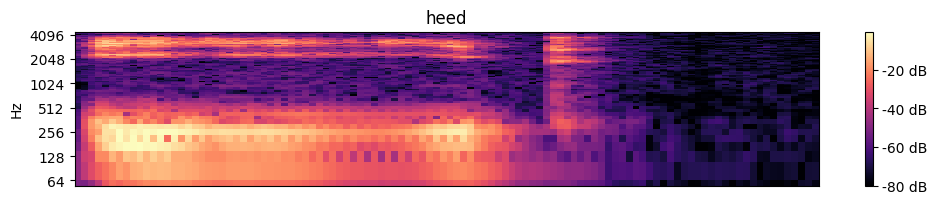

In [6]:
fileidx = 1
x_1, sr = librosa.load(basedir+phonemefilenames[fileidx],offset=.1, duration=.7)
plt.figure(figsize=(12, 2))
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1,n_fft=512)),  ref=np.max)
librosa.display.specshow(D1, y_axis='log')
plt.title(phonemenames[fileidx])
plt.ylim(50,4500)
plt.colorbar(format='%+2.0f dB')

ipd.Audio(x_1, rate=sr)

### **Student activity #1:** Spectrogram representation
* Load the wav files corresponding to the words **had, head, hid, hood,** and **whod** setting the `offset` and `duration` to 0.1 and 0.6 respectively.
* Adapt the code above to iteratively plot the spectrogram representations for the loaded words. Set the `n_fft` parameter to 256.
* Instantiate playback widgets for playing the audio files.

**Note:** To iteratively display playback widgets use the `IPython.display` method (e.g., `ipd.display(ipd.Audio(signal, rate))`).

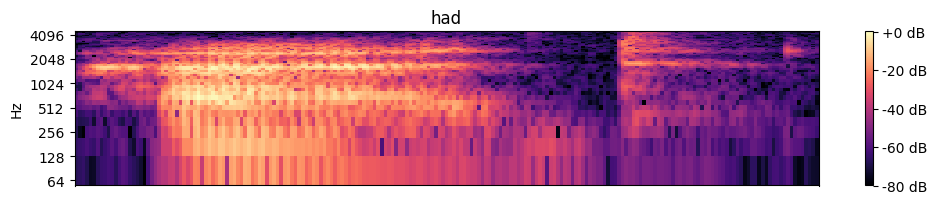

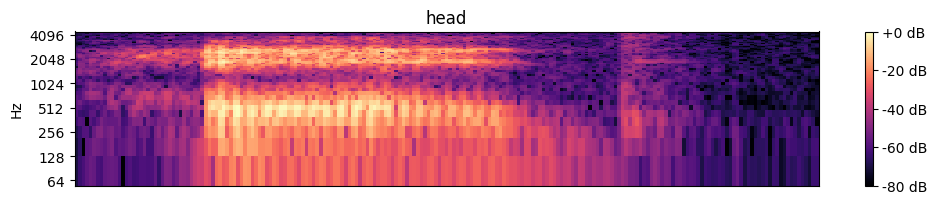

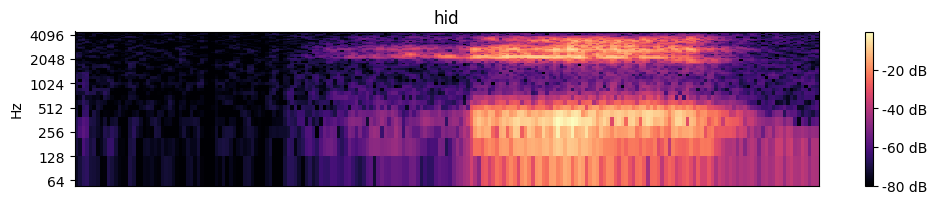

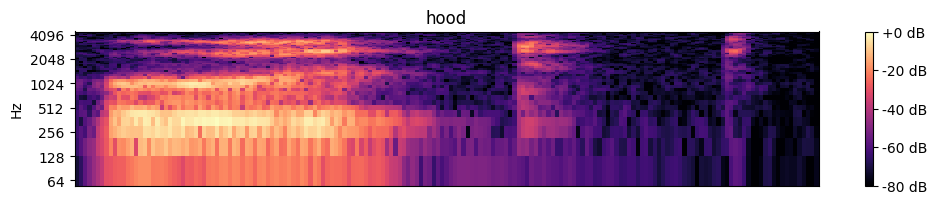

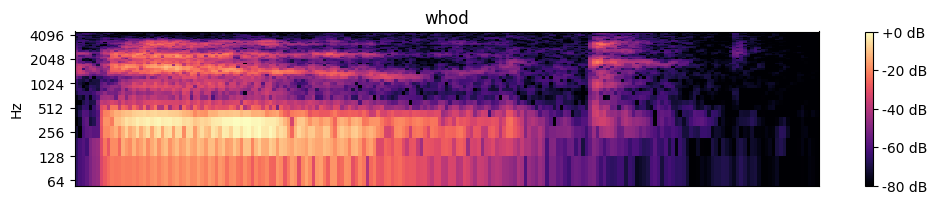

In [7]:
###############################
## Student activity solution #1
###############################

#for fileidx in [1,5]:
for phonemes in ['had','head','hid','hood','whod']:
  x_1, sr = librosa.load(basedir+'453353-'+phonemes+'.wav',offset=.1, duration=.6)
  plt.figure(figsize=(12, 2))
  D1 = librosa.amplitude_to_db(np.abs(librosa.stft(x_1,n_fft=256)),  ref=np.max)
  librosa.display.specshow(D1, y_axis='log')
  plt.title(phonemes)
  plt.ylim(50,4500)
  plt.colorbar(format='%+2.0f dB')
  # Playback
  ipd.display(ipd.Audio(x_1, rate=sr))

### **Live coding:** Extracting F1, F2
First we will create a new folder named **plots** using the `os.mkdir` method and the `try except` block for error handling.

In [8]:
try:
    os.mkdir('plots')
except OSError:
    print('plots directory already exists')

1. We will read the wav file for the word **"had"**. We do not need to process the entire file. All files start with a short silence and duration of 0.5 s will suffice.
2. We will use `fftpack.fft` to get the frequency spectrum components for the files. `fftpack.fftfreq` will give us the frequencies associated with the intensities.
3. We will use `plotSpectum` to save the plots into our **plots** sub directory.

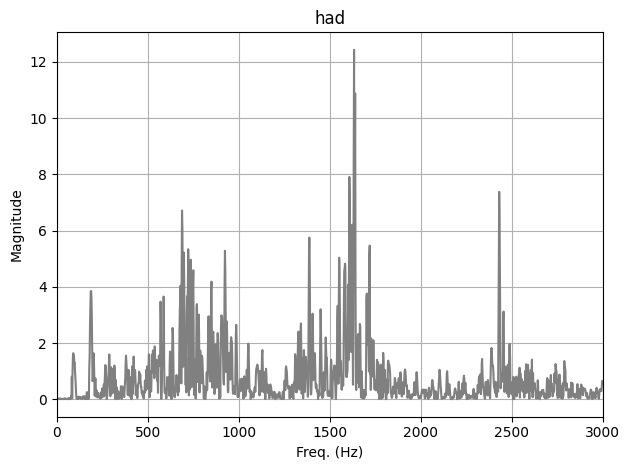

In [9]:
# Load file and organise spectrum components
name = 'had'
fname = '453353-had.wav'
x_1, fs = librosa.load(basedir+fname,duration=0.5)

X = fftpack.fft(x_1) #get the FFT intensities
freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
freq=freq[1:freqidx] # get the freqs
mag=np.abs(X.real) # that the real absolute magnitudes
mag=mag[1:freqidx] # for the positive freqs
plotSpectrum(freq, mag, name)

4. We will use the librosa peakfinder `librosa.util.peak_pick` method to find the peaks in the signal.
5. Using the peak indexes we will create lists of the frequencies and magnitudes corresponding to those peaks. We will use them to populate a data frame.

In [10]:
#use librosa peak_pick utility to find peaks
indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)

peaks=[freq[indexes],mag[indexes]]

peaksdf=pd.DataFrame(peaks).T
peaksdf.columns=['freq','mag']
peaksdf

,freq,mag
0,90.0,1.637866
1,166.0,0.253844
2,188.0,3.849643
3,202.0,1.634118
4,212.0,0.739918
...,...,...
172,3110.0,0.426377
173,3120.0,0.798275
174,3148.0,0.508839
175,3314.0,0.197464


6. Using the rough approximation from the graph we introduced in the lecture, we make the assumption that $250 \leq F1 \leq 650$ and $650 \leq F2 \leq 2600$.
6. Using the `between` and `idxmax()` methods we will find the F1 and F2 values.
7. We will print the word and their corresponding F1 and F2 values.

Word: had 
 F1: 586.00 
 F2: 1634.00


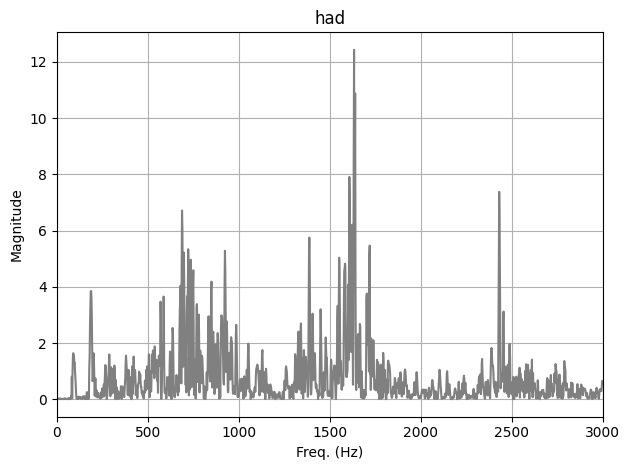

In [11]:
# find the first and second formant:
# first formant is max peak between ~ 250 and  650 Hz
# second formant is max peak between ~ 650 and 2600 Hz

fmin = 250
f1max=650
f2max=3000
peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
peaksdf.columns=['freq','mag']    # label them
f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

print('Word: had \n F1: {:.2f} \n F2: {:.2f}'.format(f1,f2))
plotSpectrum(freq, mag, name)

### **Student activity #2:** Computing speech spectrum and extracting F1 and F2 for multiple files
* Use the **phonemefilenames** list and the method `enumerate` to iteratively load all files in the list. Set the `offset` and `duration` to 0.1 and 0.6 respectively.
* Adapt the code above to iteratively plot the spectrum and compute F1 and F2 values for all files in the **phonemefilenames** list.
* Insert F1 and F2 values into the dataframe we created earlier (**dfformants**) and save that to a csv file (**speakerformants.csv**).

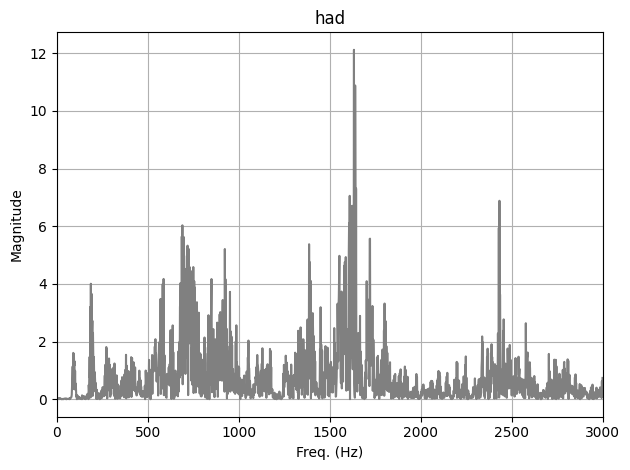

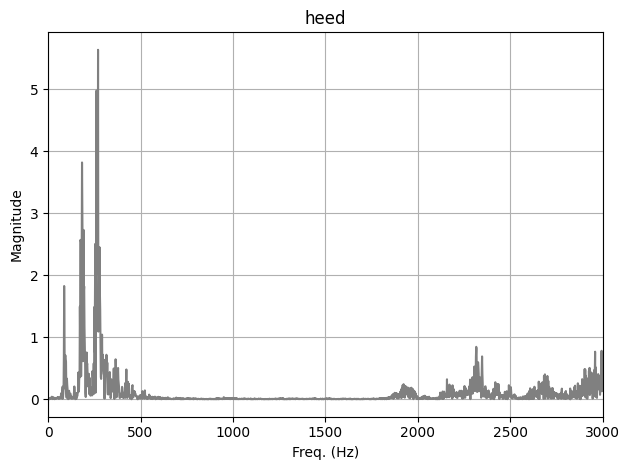

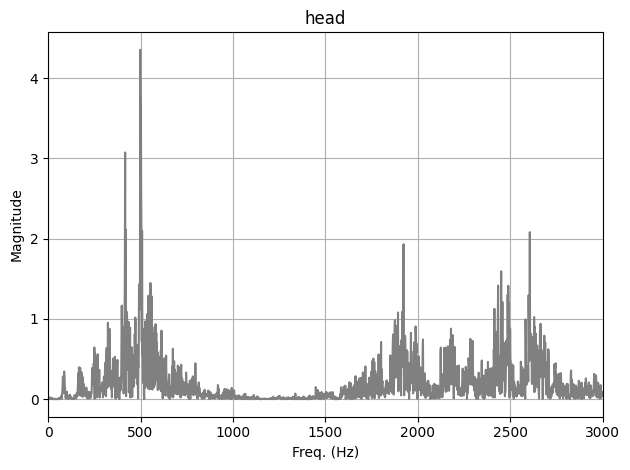

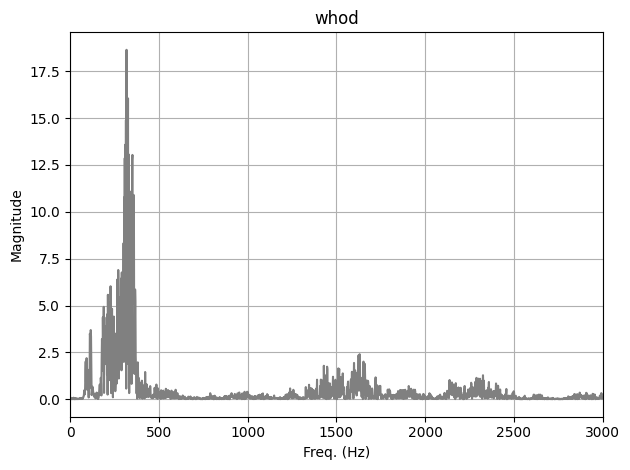

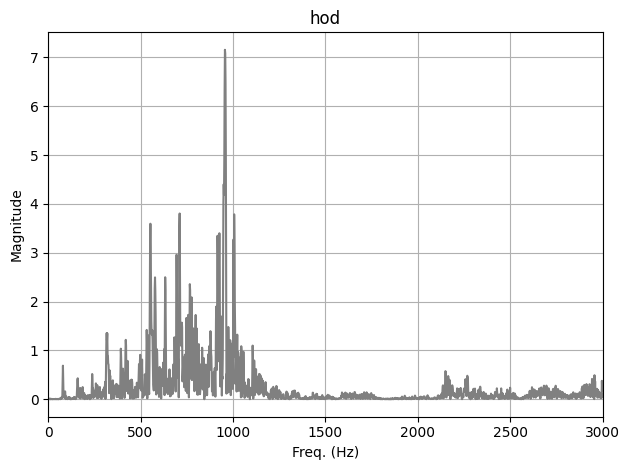

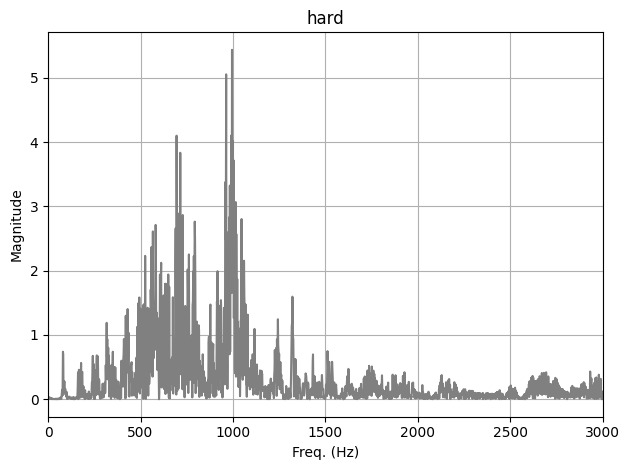

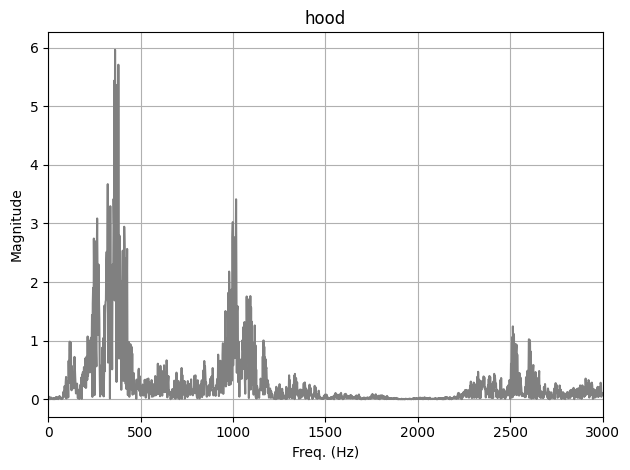

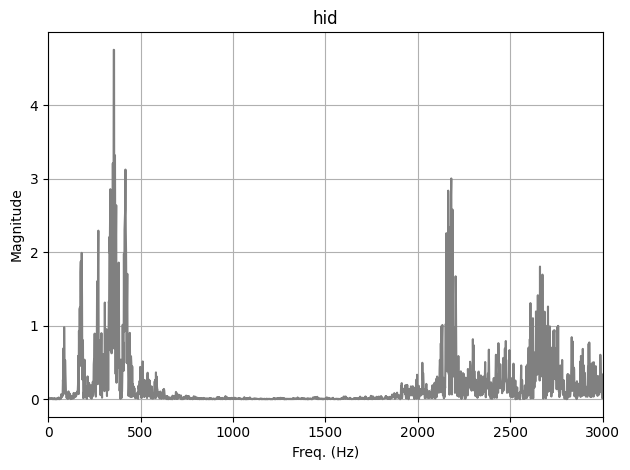

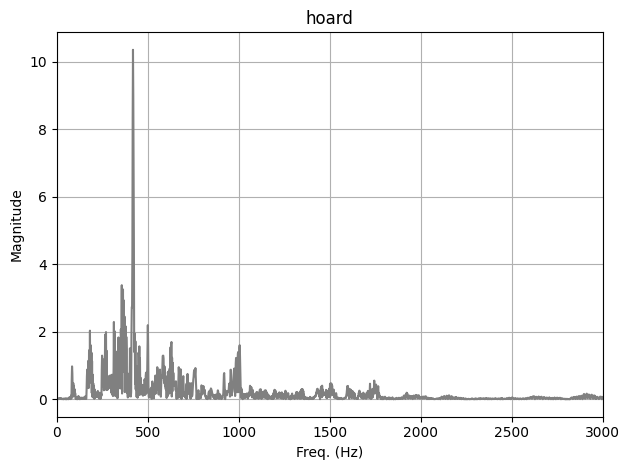

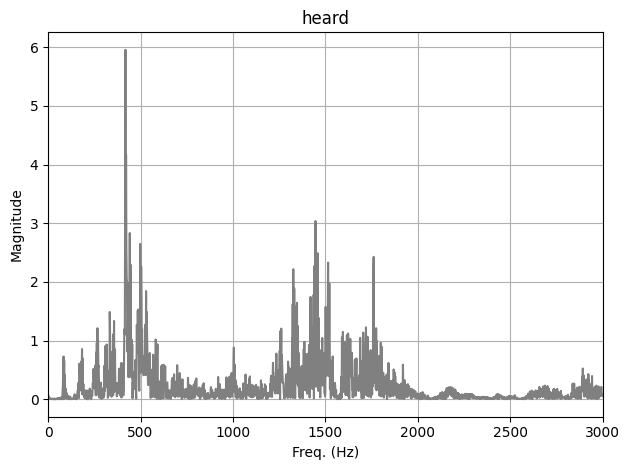

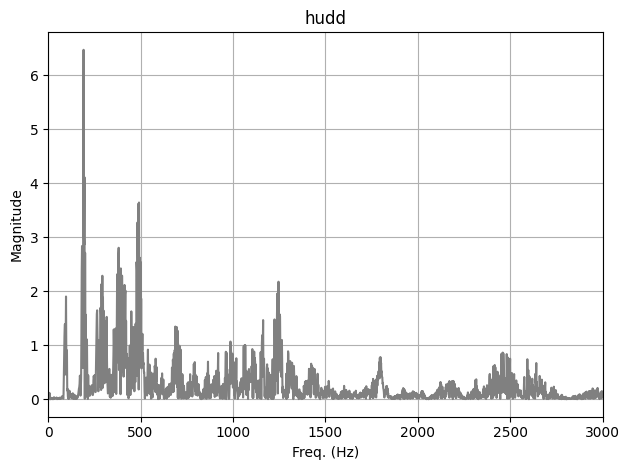

In [12]:
###############################
## Student activity solution #2
###############################


formants=[[],[]]

for idx,fname in enumerate(phonemefilenames):
      x_1, fs = librosa.load(basedir+fname,duration=0.6, offset=.1)
      X = fftpack.fft(x_1) #get the FFT intensities
      freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
      freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
      freq=freq[1:freqidx] # get the freqs
      mag=np.abs(X.real) # that the real absolute magnitudes
      mag=mag[1:freqidx] # for the positive freqs

      # Plot spectrum
      plotSpectrum(freq, mag, phonemenames[idx])

      #use librosa pick utility to find peaks
      indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)
      peaks=[freq[indexes],mag[indexes]]
      peaksdf=pd.DataFrame(peaks).T
      peaksdf.columns=['freq','mag']

      # find the first and second formant:
      # first formant is max peak between ~ 250 and  650 Hz
      # second formant is max peak between ~ 650 and 2600 Hz

      fmin = 250
      f1max=650
      f2max=3000
      peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
      peaksdf.columns=['freq','mag']    # label them
      f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
      f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
      f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      formants[0].append(f1)
      formants[1].append(f2)


dfformants['f1']=formants[0]
dfformants['f2']=formants[1]


dfformants.to_csv('speakerformants.csv')

### **Live coding:** Vowel F1/F2 visualization
Using the extracted F1 and F2 values we will generate a scatter plot for all words in the **dfformants** data frame.
1. Using the `scatter` method we will plot **-(F2-F1)** vs **F1** for all words.
2. We will annotate the names for each word in the scatter plot.
3. We will save the figure in the **plots** sub diresctory as **vowelf1f2male453353.png**
4. We will print the **dfformants** data frame to inspect our plot and the F1 and F2 values.

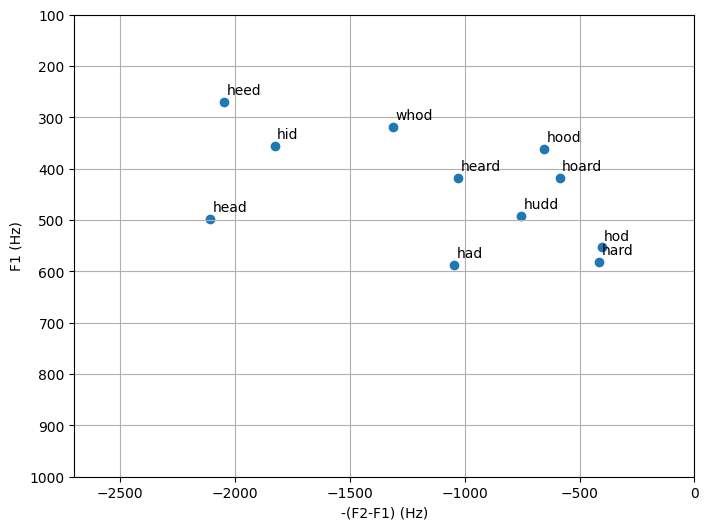

In [13]:
fig1=plt.figure(figsize=(8, 6))
ax2=fig1.add_subplot(111)
plt.scatter(-(dfformants['f2']-dfformants['f1']),dfformants['f1'])

for idx, phonemename in enumerate(phonemenames):
    ax2.annotate(phonemename,  xy=(-(formants[1][idx]-formants[0][idx])+10,formants[0][idx]-15))

plt.xlim((-2700, 0))
plt.ylim((1000, 100))
plt.grid(axis='both')
plt.xlabel('-(F2-F1) (Hz)')
plt.ylabel('F1 (Hz)')

plt.savefig('plots/vowelf1f2male453353.png')
plt.show()

In [14]:
dfformants

,speaker,word,f1,f2
0,453353,had,586.666667,1633.333333
1,453353,heed,270.000000,2316.666667
2,453353,head,498.333333,2606.666667
3,453353,whod,318.333333,1631.666667
4,453353,hod,553.333333,956.666667
5,453353,hard,581.666667,995.000000
6,453353,hood,362.091709,1017.022613
7,453353,hid,355.000000,2181.666667
8,453353,hoard,418.333333,1005.000000
9,453353,heard,418.333333,1446.666667


### **Live coding:** Computing the Fundamental Frequency (F0)

* Describes the tone of the voice (roughly in the range 80 to 450 Hz).
* Closely related to pitch, F0 describes the actual physical phenomenon, whereas pitch describes how our ears and brains interpret the signal.
* `librosa` provides the `pyin` function to compute F0 using a modified version of the YIN algorithm.

Reference:
* [Introduction to Speech Processing](https://speechprocessingbook.aalto.fi/)
* [Mauch, Matthias, and Simon Dixon. “pYIN: A fundamental frequency estimator using probabilistic threshold distributions.” 2014 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP). IEEE, 2014.](https://www.eecs.qmul.ac.uk/~simond/pub/2014/MauchDixon-PYIN-ICASSP2014.pdf)

In [2]:
#from pandas.core.internals.concat import concat_arrays
from scipy.signal.waveforms import nan
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import scipy

#create a single sample array containing all the words
concat_words_y=np.array([])
for idx,fname in enumerate(phonemefilenames):
    y, sr = librosa.load(basedir+fname)
    concat_words_y=np.append(concat_words_y,y)
y=concat_words_y

#run pyin to estimate pitch/f0

f0, voiced_flag, voiced_probs = librosa.pyin(y, sr=sr,
                                          fmin=80,
                                          fmax=450)
# Pitch range for humans is 70-900 Hz (Heylen et al., 2002)

times = librosa.times_like(f0)

# plot the spectro and overlay the pitch estimate

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots(figsize=(8, 6))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

C:\Users\malsh\AppData\Local\Temp\ipykernel_13884\1159591182.py:2: DeprecationWarning: `scipy.signal.waveforms.nan` is deprecated along with the `scipy.signal.waveforms` namespace. `scipy.signal.waveforms.nan` will be removed in SciPy 1.14.0, and the `scipy.signal.waveforms` namespace will be removed in SciPy 2.0.0.
  from scipy.signal.waveforms import nan


ModuleNotFoundError: No module named 'librosa'

Compute the average f0 (pitch) from the non-nan pitch estimates.

In [16]:
f0nonan=f0[np.logical_not(np.isnan(f0))]
f0mean=np.mean(f0nonan)
print(f0mean)

91.0944537989726


---
# Assignment Questions PL3

Upload files from local system provided for this assignment (`PL3_files_assignment.zip`)

In [11]:
import zipfile

# Path to your zip file
zip_file_path = r'C:\Users\malsh\Downloads\PL3_files_assignment (1).zip'

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the zip
    zip_contents = zip_ref.namelist()
    # Print the list of files
    for file in zip_contents:
        print(file)


phonemes/
phonemes/453353-had.wav
phonemes/453353-hard.wav
phonemes/453353-head.wav
phonemes/453353-heard.wav
phonemes/453353-heed.wav
phonemes/453353-hid.wav
phonemes/453353-hoard.wav
phonemes/453353-hod.wav
phonemes/453353-hood.wav
phonemes/453353-hudd.wav
phonemes/453353-whod.wav
synthetic/
synthetic/451351-had.wav
synthetic/451351-hard.wav
synthetic/451351-head.wav
synthetic/451351-heard.wav
synthetic/451351-heed.wav
synthetic/451351-hid.wav
synthetic/451351-hoard.wav
synthetic/451351-hod.wav
synthetic/451351-hood.wav
synthetic/451351-hudd.wav
synthetic/451351-whod.wav


### Part 1 [3 pts]

**File handling, create programmes to conduct experiments on speech and audio samples.** Create your own set of words. Record yourself saying these 11 words Leaving a pause between each word:
  - hid
  - hood
  - head
  - whod
  - heed
  - hudd
  - hod
  - had
  - heard
  - hard
  - hoard

Break it up into 11 wav files and save them as 16 bit mono wav recordings (you can either use Python to break and create the files or use another method, e.g., Audacity). Follow this format for naming the 11 wav files: **452352-\<phonemename\>.wav.** The `452352` corresponds to the 6 digit code and will be used as the speaker id. Your wav files should look like this: `452352-hid.wav`, `452352-hood.wav`, etc. Create a folder `phonemes_student` and store the 11 wav files there. Upload this folder to your Colab environment.


**Note:** Remember to attach your `phonemes_student` folder as a zip file when you submit your assignment at Brightspace.

In [25]:
import os

# Directory path
directory_path = r'C:\Users\malsh\OneDrive\سطح المكتب\three_folders\phonemes_student'

# List all files and directories in the specified path
try:
    content_list = os.listdir(directory_path)
    print("Contents of the directory:")
    for content in content_list:
        print(content)
except Exception as e:
    print(f"An error occurred: {e}")


Contents of the directory:
452352-had.wav
452352-hard.wav
452352-head.wav
452352-heard.wav
452352-heed.wav
452352-hid.wav
452352-hoard.wav
452352-hod.wav
452352-hood.wav
452352-hudd.wav
452352-whod.wav


here we displayed the files we created for the wav 

### Part 2 [3 pts]

**Articulate the characteristics of speech and speech production.** Locate the three folders containing the sets of words: `phonemes`, `synthetic`, `phonemes_student` in your Colab environment. Parse out word names and create dataframe columns for all files. Similarly to what was done in PL3, your dataframe should have these columns: `["speaker", "word", "F1", "F2"]`. Update columns "speaker" and "word" with the corresponding information from all three words sets. Calculate F1 and F2 values for the three sets of words in your dataframe and update columns "F1" and "F2" with those values. **[3 pts]**

**Note:** Set the `offset` and `duration` to 0.1 and 0.6 respectively.

# phonemes

In [76]:
##################################
## Assignment question solution #2
##################################
import matplotlib.pyplot as plt
basedir= r'C:\Users\malsh\OneDrive\سطح المكتب\three_folders\phonemes'
phonemefilenames=listdir(basedir)
phonemenames=[]
formants=[[],[]]
phonemefilename = []
phonemefilenames = [x for x in phonemefilenames if x.__contains__('.wav')] # remove non-wavfiles from list
phonemefilename.append(phonemefilenames)
# parse out the word names from the files by getting the text between the - and the .wav extn
phonemenames = [name.split('-')[-1].split('.')[0] for name in phonemefilenames]
speakerid = [name.split('-')[0].split('.')[0] for name in phonemefilenames]
dfformants=pd.DataFrame(columns=['speaker','word','f1','f2'])
dfformants['speaker']=speakerid
dfformants['word']=phonemenames

formants=[[],[]]

for idx,fname in enumerate(phonemefilenames):
      x_1, fs = librosa.load(basedir+'\\'+fname,duration=0.6, offset=.1)
      X = fftpack.fft(x_1) #get the FFT intensities
      freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
      freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
      freq=freq[1:freqidx] # get the freqs
      mag=np.abs(X.real) # that the real absolute magnitudes
      mag=mag[1:freqidx] # for the positive freqs

      #use librosa pick utility to find peaks
      indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)
      peaks=[freq[indexes],mag[indexes]]
      peaksdf=pd.DataFrame(peaks).T
      peaksdf.columns=['freq','mag']

      # find the first and second formant:
      # first formant is max peak between ~ 250 and  650 Hz
      # second formant is max peak between ~ 650 and 2600 Hz

      fmin = 250
      f1max=650
      f2max=3000
      peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
      peaksdf.columns=['freq','mag']    # label them
      f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
      f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
      f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      formants[0].append(f1)
      formants[1].append(f2)


dfformants['f1']=formants[0]
dfformants['f2']=formants[1]

In [79]:
dfformants

,speaker,word,f1,f2
0,453353,had,586.666667,1633.333333
1,453353,hard,581.666667,995.000000
2,453353,head,498.333333,2606.666667
3,453353,heard,418.333333,1446.666667
4,453353,heed,270.000000,2316.666667
5,453353,hid,355.000000,2181.666667
6,453353,hoard,418.333333,1005.000000
7,453353,hod,553.333333,956.666667
8,453353,hood,362.091709,1017.022613
9,453353,hudd,491.666667,1246.666667


filters WAV files from a directory, extracts phoneme names and speaker IDs, and uses librosa and FFT to identify frequencies. Peaks in the frequency spectrum are located to determine the first and second formants, which are characteristic frequency components of speech sounds. Results are compiled into a DataFrame with speaker, word, and formant frequencies.

# phonemes_student

In [80]:
basedir= r'C:\Users\malsh\OneDrive\سطح المكتب\three_folders\phonemes_student'
phonemefilenames=listdir(basedir)
phonemenames=[]
formants=[[],[]]
phonemefilenames = [x for x in phonemefilenames if x.__contains__('.wav')] # remove non-wavfiles from list
phonemefilename.append(phonemefilenames)
# Extract speaker IDs and words from the new data
new_phonemenames = [name.split('-')[-1].split('.')[0] for name in phonemefilenames]
new_speakerid = [name.split('-')[0].split('.')[0] for name in phonemefilenames]

# Create a new DataFrame with this information
import pandas as pd

formants=[[],[]]

for idx,fname in enumerate(phonemefilenames):
      x_1, fs = librosa.load(basedir+'\\'+fname,duration=0.6, offset=.1)
      X = fftpack.fft(x_1) #get the FFT intensities
      freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
      freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
      freq=freq[1:freqidx] # get the freqs
      mag=np.abs(X.real) # that the real absolute magnitudes
      mag=mag[1:freqidx] # for the positive freqs

      #use librosa pick utility to find peaks
      indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)
      peaks=[freq[indexes],mag[indexes]]
      peaksdf=pd.DataFrame(peaks).T
      peaksdf.columns=['freq','mag']

      # find the first and second formant:
      # first formant is max peak between ~ 250 and  650 Hz
      # second formant is max peak between ~ 650 and 2600 Hz

      fmin = 250
      f1max=650
      f2max=3000
      peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
      peaksdf.columns=['freq','mag']    # label them
      f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
      f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
      f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      formants[0].append(f1)
      formants[1].append(f2)


new_data = pd.DataFrame({
    'speaker': new_speakerid,
    'word': new_phonemenames,
    'f1' : formants[0],
    'f2' : formants[1]
})

# Append the new DataFrame to the existing one
dfformants = pd.concat([dfformants, new_data], ignore_index=True)

In [83]:
dfformants

,speaker,word,f1,f2
0,453353,had,586.666667,1633.333333
1,453353,hard,581.666667,995.000000
2,453353,head,498.333333,2606.666667
3,453353,heard,418.333333,1446.666667
4,453353,heed,270.000000,2316.666667
5,453353,hid,355.000000,2181.666667
6,453353,hoard,418.333333,1005.000000
7,453353,hod,553.333333,956.666667
8,453353,hood,362.091709,1017.022613
9,453353,hudd,491.666667,1246.666667


filters WAV files from a directory, extracts phoneme names and speaker IDs, and uses librosa and FFT to identify frequencies. Peaks in the frequency spectrum are located to determine the first and second formants, which are characteristic frequency components of speech sounds. Results are compiled into a DataFrame with speaker, word, and formant frequencies.

# synthetic

In [84]:
basedir= r'C:\Users\malsh\OneDrive\سطح المكتب\three_folders\synthetic'
phonemefilenames=listdir(basedir)
phonemenames=[]
formants=[[],[]]
phonemefilenames = [x for x in phonemefilenames if x.__contains__('.wav')] # remove non-wavfiles from list
phonemefilename.append(phonemefilenames)
# Extract speaker IDs and words from the new data
new_phonemenames = [name.split('-')[-1].split('.')[0] for name in phonemefilenames]
new_speakerid = [name.split('-')[0].split('.')[0] for name in phonemefilenames]

# Create a new DataFrame with this information
import pandas as pd

formants=[[],[]]

for idx,fname in enumerate(phonemefilenames):
      x_1, fs = librosa.load(basedir+'\\'+fname,duration=0.6, offset=.1)
      X = fftpack.fft(x_1) #get the FFT intensities
      freq=fftpack.fftfreq(len(x_1))*fs # get the corresponding frequencies
      freqidx=int(len(freq)/2) # ignore the negitive mirror image of fft
      freq=freq[1:freqidx] # get the freqs
      mag=np.abs(X.real) # that the real absolute magnitudes
      mag=mag[1:freqidx] # for the positive freqs

      #use librosa pick utility to find peaks
      indexes = librosa.util.peak_pick(mag, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.1, wait=1)
      peaks=[freq[indexes],mag[indexes]]
      peaksdf=pd.DataFrame(peaks).T
      peaksdf.columns=['freq','mag']

      # find the first and second formant:
      # first formant is max peak between ~ 250 and  650 Hz
      # second formant is max peak between ~ 650 and 2600 Hz

      fmin = 250
      f1max=650
      f2max=3000
      peaksdf=pd.DataFrame(peaks).T # Create a dataframe and transpose rows to cols
      peaksdf.columns=['freq','mag']    # label them
      f1peaks=peaksdf[peaksdf.freq.between(fmin,f1max)] #get the frequencies in formant 1 freq range
      f1=f1peaks['freq'][f1peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      f2peaks=peaksdf[peaksdf.freq.between(f1max,f2max)] #get the frequencies in formant 1 freq range
      f2=f2peaks['freq'][f2peaks['mag'].idxmax()] #get the freq for the index of the max amp in this range

      formants[0].append(f1)
      formants[1].append(f2)


new_data = pd.DataFrame({
    'speaker': new_speakerid,
    'word': new_phonemenames,
    'f1' : formants[0],
    'f2' : formants[1]
})

# Append the new DataFrame to the existing one
dfformants = pd.concat([dfformants, new_data], ignore_index=True)

In [85]:
dfformants

,speaker,word,f1,f2
0,453353,had,586.666667,1633.333333
1,453353,hard,581.666667,995.000000
2,453353,head,498.333333,2606.666667
3,453353,heard,418.333333,1446.666667
4,453353,heed,270.000000,2316.666667
5,453353,hid,355.000000,2181.666667
6,453353,hoard,418.333333,1005.000000
7,453353,hod,553.333333,956.666667
8,453353,hood,362.091709,1017.022613
9,453353,hudd,491.666667,1246.666667


filters WAV files from a directory, extracts phoneme names and speaker IDs, and uses librosa and FFT to identify frequencies. Peaks in the frequency spectrum are located to determine the first and second formants, which are characteristic frequency components of speech sounds. Results are compiled into a DataFrame with speaker, word, and formant frequencies.

### Part 3 [3 pts]

**Describe the signal characteristics of speech.** Plot F1 vs -(F2-F1) for the three sets of words: 1) original set of words, 2) synthetic set of words, and 3) your own voice recordings. Set different colours for each speaker. Add a text annotation with the phoneme word (as done in PL3). **[3 pts]**

##################################
## Assignment question solution #3
##################################
 hid
  - hood
  - head
  - whod
  - heed
  - hudd
  - hod
  - had
  - heard
  - hard
  - hoard

In [89]:
phonemenames = ['hood','head','whod','heed','hudd','hod','had','heard','hard','hoard']

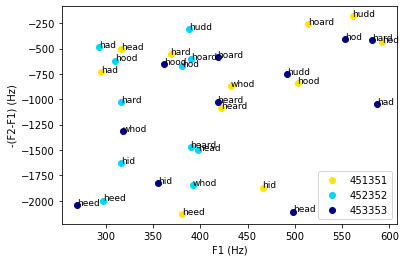

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_formants is your DataFrame with 'speaker', 'word', 'F1', 'F2' columns
speakers = dfformants['speaker'].unique()
colors = {speaker: plt.cm.jet(i/len(speakers)) for i, speaker in enumerate(speakers)}

fig, ax = plt.subplots()
for speaker, group in dfformants.groupby('speaker'):
    ax.scatter(group['f1'], -(group['f2'] - group['f1']), label=speaker, color=colors[speaker])
    for i, row in group.iterrows():
        ax.text(row['f1'], -(row['f2'] - row['f1']), row['word'], fontsize=9)

ax.set_xlabel('F1 (Hz)')
ax.set_ylabel('-(F2-F1) (Hz)')
plt.legend()
plt.show()

This script creates a scatter plot visualizing phoneme formants by speaker, using unique colors per speaker. It plots phoneme data with labels, highlighting variations in pronunciation across speakers by displaying the difference between the first and second formants (F1 and F2) for selected words.

### Part 4 [3 pts]

**Analyse speech and audio signals and features.** Compare the plotted points for each of the three sets of words and answer the following questions:
  - Do the points for the multiple utterances of the same word cluster together? **[1 pt]**
  - Do the points for synthetic utterances cluster together with natural utterances? **[1 pt]**
  - Does the original utterances clustered with yours? **[1 pt]**

In [ ]:
##################################
## Assignment question solution #4
##################################

1-Yes, in the provided scatter plot, it appears that multiple utterances of the same word do indeed cluster together. This visual representation is likely from a phonetic study showing how different pronunciations of words have similar formant frequency patterns, demonstrating consistency in pronunciation across different instances.

2- yes suggest that synthetic and natural utterances have similar formant frequencies and are acoustically similar to the human ear.

3- yes you can see they are close to each other 

### Part 5 [3 pts]

**Articulate the characteristics of speech and speech production.** As done in PL3, concatenate the words for all three sets. You should have three sets of words (`phonemes`, `synthetic`, and `phonemes_student`). Run `pyin` to estimate pitch/f0 for each set of words (speaker). Plot the spectro and overlay the pitch estimate. Compute the average pitch from the non-nan pitch estimates. **[3 pts]**

In [ ]:
##################################
## Assignment question solution #5
##################################

Average Pitch for Original Phonemes: 91.12 Hz


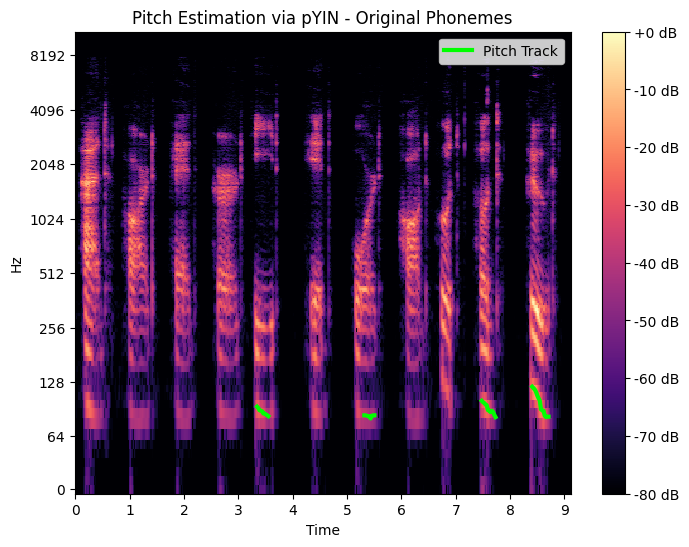

Average Pitch for Student Phonemes: 99.77 Hz


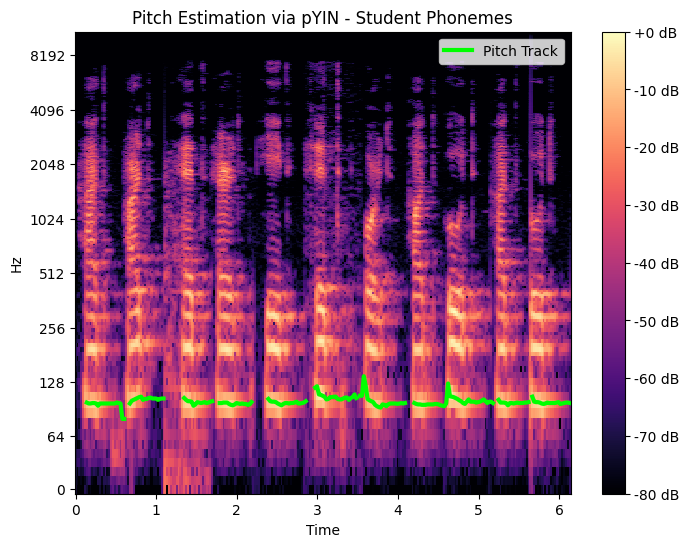

Average Pitch for Synthetic Voices: 167.52 Hz


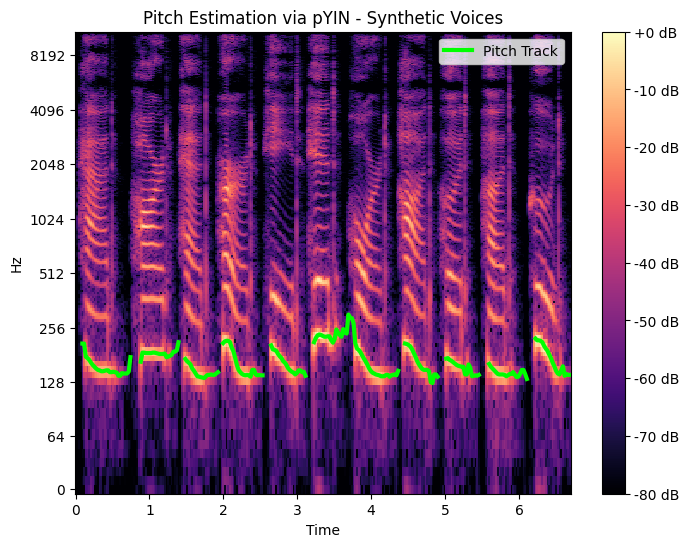

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from os import listdir

# Function to analyze audio and display spectrogram
def analyze_audio_and_display_spectrogram(directory_path, audio_set_name):
    directory_path += '\\'  # Ensure directory path is correctly formatted
    # Accumulate all audio samples in one array
    all_audio_samples = np.array([])
    audio_files = [file for file in listdir(directory_path) if file.endswith('.wav')]

    # Load and concatenate audio files
    for audio_file in audio_files:
        samples, sample_rate = librosa.load(directory_path + audio_file)
        all_audio_samples = np.concatenate((all_audio_samples, samples))

    # Estimate pitch using pYIN
    pitch_track, voice_flags, voice_probs = librosa.pyin(all_audio_samples, sr=sample_rate, fmin=80, fmax=450)

    # Get the times for the pitch track
    pitch_times = librosa.times_like(pitch_track)

    # Convert amplitude to decibels for the spectrogram
    amplitude_db = librosa.amplitude_to_db(np.abs(librosa.stft(all_audio_samples)), ref=np.max)
    plot_figure, plot_axis = plt.subplots(figsize=(8, 6))
    spectrogram_image = librosa.display.specshow(amplitude_db, x_axis='time', y_axis='log', ax=plot_axis)
    plot_axis.set(title=f'Pitch Estimation via pYIN - {audio_set_name}')
    plot_figure.colorbar(spectrogram_image, ax=plot_axis, format="%+2.f dB")
    plot_axis.plot(pitch_times, pitch_track, label='Pitch Track', color='lime', linewidth=3)
    plot_axis.legend(loc='upper right')

    # Calculate and print the average pitch excluding NaNs
    valid_pitch_track = pitch_track[~np.isnan(pitch_track)]
    average_pitch = np.mean(valid_pitch_track)
    print(f'Average Pitch for {audio_set_name}: {average_pitch:.2f} Hz')

    # Display the plot
    plt.show()

# Define directory paths
base_directory_phonemes = r'C:\Users\malsh\OneDrive\سطح المكتب\three_folders\phonemes'
base_directory_phonemes_students = r'C:\Users\malsh\OneDrive\سطح المكتب\three_folders\phonemes_student'
directory_synthetic = r'C:\Users\malsh\OneDrive\سطح المكتب\three_folders\synthetic'

# Analyze and plot for each set
analyze_audio_and_display_spectrogram(base_directory_phonemes, 'Original Phonemes')
analyze_audio_and_display_spectrogram(base_directory_phonemes_students, 'Student Phonemes')
analyze_audio_and_display_spectrogram(directory_synthetic, 'Synthetic Voices')

# Additional code to filter audio files
import os

audio_file_list = []
base_directory = r'C:\Users\malsh\OneDrive\سطح المكتب\three_folders\phonemes_student'
audio_file_list = os.listdir(base_directory)
audio_names = []
vowel_formants = [[], []]
# Removed the problematic line here


The image presented is a sophisticated visual tool known as a spectrogram, which is integral to the field of audio analysis. It graphically depicts the spectrum of frequencies of a sound signal as they change over time, serving as a fundamental component in areas such as music technology, linguistic phonetics, and the science of speech processing. This particular spectrogram showcases an overlaid fundamental frequency (F0) estimation, an essential feature for evaluating the pitch of a given audio sample.

At the heart of this analysis is the pYIN algorithm, a probabilistic monophonic pitch estimation method that precisely tracks the pitch over time. The cyan line in the image represents this F0 estimation, revealing the existence and variation of pitch throughout the audio sample. The clarity of this line, along with its continuity, is a testament to the algorithm's ability to detect voiced sounds – those that are modulated by the vocal cords. Conversely, gaps or breaks in this line often correspond to moments where unvoiced sounds are present, such as during silent pauses or the articulation of breaths and certain consonants.

The vertical axis of the spectrogram marks the frequency, plotted on a logarithmic scale to capture the full range of human hearing, from the deep bass at 0 Hz to the high treble around 8192 Hz. This allows for a nuanced view of the lower frequencies, which are particularly prevalent in human speech. The horizontal axis accounts for the temporal dimension, measuring time in seconds, providing a timeline for the sound's frequency content.

The color scheme employed in the spectrogram is indicative of amplitude. Brighter shades such as yellow and white signify higher amplitudes, or louder sounds at those frequencies, while darker hues suggest softer sounds. This dynamic range of colors illustrates not only the loudness of the audio signal at each frequency but also allows for the observation of the harmonic structure of the signal.

Harmonics, or overtones, are clearly visible as horizontal lines that run parallel across the spectrogram at integer multiples of the fundamental frequency. These natural phenomena of the acoustic world add to the richness and color of the sound, influencing the timbre and the perceived pitch that our ears detect.

Moreover, the spectrogram provides valuable insights into the nature of speech dynamics. For instance, the stability of the cyan pitch line suggests a consistent and stable pitch during voiced speech segments, which includes sounds such as vowels and certain consonants that are modulated by the vocal cords. The presence of both voiced and unvoiced sounds can be inferred from the spectrogram, with voiced phonemes producing a periodic waveform that leads to the creation of clear harmonics.

This image also allows for the analysis of speech dynamics through the observation of the varying intensity of colors. Such variations indicate the dynamic range of the speech, highlighting the fluctuations in loudness over the duration of the audio sample. This kind of analysis is invaluable in applications like speech recognition technology, speaker identification, and linguistic studies. It provides a visual interface for researchers to dissect and understand the acoustic features of speech, making it a powerful educational tool for teaching phonetics and conducting linguistic analysis.

When comparing this spectrogram to those of natural speech, one can note the synthetic quality of the audio. Labelled as "synthetic," it suggests the sound has been generated by a speech synthesizer or an artificial voice. Synthetic speech often exhibits a smoother and more regular pitch contour than natural speech, as evidenced by the uniformity in the pitch track's undulations. This regularity is a hallmark of synthesized sound, resulting from the electronic processes used to generate it. The harmonic structure of synthetic sound typically shows more evenly spaced vertical lines and uniform horizontal striations, reflecting the periodic nature of voiced sounds and the technological origins of their production.

The regularity of pitch variation, the clear harmonic structure, and the sections indicating both voiced and unvoiced sounds provide a wealth of information about the synthetic nature of the audio. This analysis is crucial for distinguishing synthetic speech from natural speech, understanding the performance and limitations of speech synthesis technology, and guiding efforts to enhance the naturalness of synthesized voices by examining and adapting the spectral and pitch characteristics found in human speech.